# Salary Prediction

Use salary datasets salary_data.csv to build a model of prediction and test it

In [1]:
random_state = 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# import the dataset in the variable salary_df

salary_df = pd.read_csv('salary_data.csv')

In [4]:
# first lines of the data
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
# info data
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


# EDA

In [6]:
salary_df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


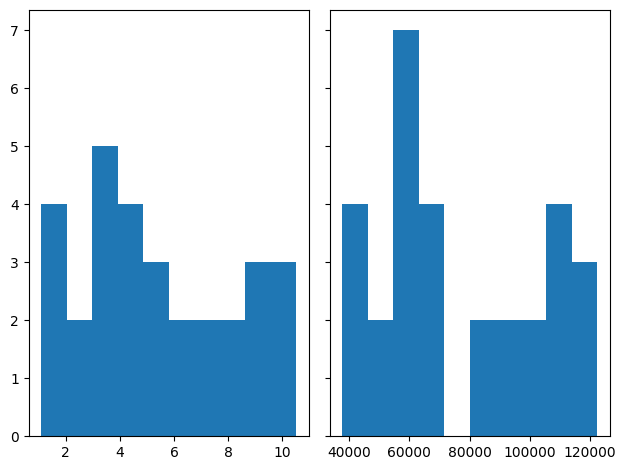

In [7]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(salary_df['YearsExperience'])
axs[1].hist(salary_df['Salary'])
plt.show()

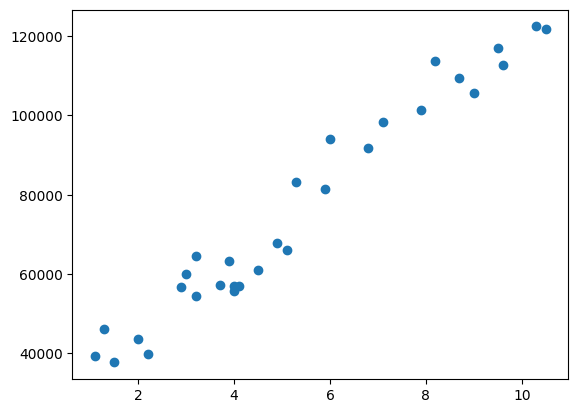

In [8]:
plt.scatter(x=salary_df['YearsExperience'], y=salary_df['Salary'])
plt.show()

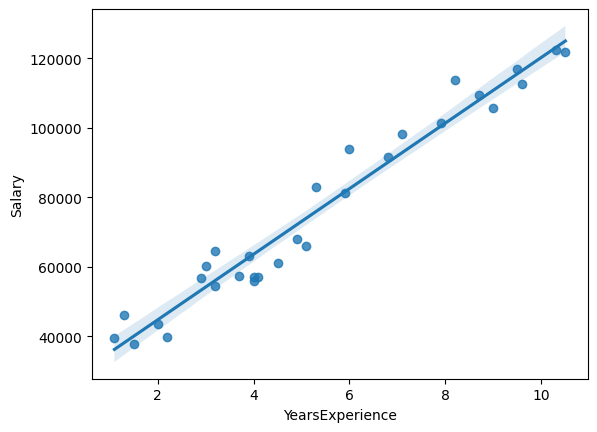

In [9]:
corr_salary = salary_df.corr()
sns.regplot(x='YearsExperience', y='Salary', data=salary_df)
plt.show()

In [10]:
# Choose your X and y
X = pd.DataFrame(salary_df['Salary'])
y = pd.DataFrame(salary_df['YearsExperience'])

In [11]:
# if you know do the split

In [12]:
salary_df = salary_df.sample(frac=1, random_state=random_state)
salary_df

,YearsExperience,Salary
17,5.3,83088
21,7.1,98273
10,3.9,63218
19,6.0,93940
14,4.5,61111
20,6.8,91738
26,9.5,116969
3,2.0,43525
24,8.7,109431
22,7.9,101302


In [13]:
train_size = int(0.8 * len(salary_df))
train_data = salary_df[:train_size]
test_data = salary_df[train_size:]

X_train = train_data[['YearsExperience']]
y_train = train_data[['Salary']]

X_test = test_data[['YearsExperience']]
y_test = test_data[['Salary']]

In [14]:
# Train data 

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

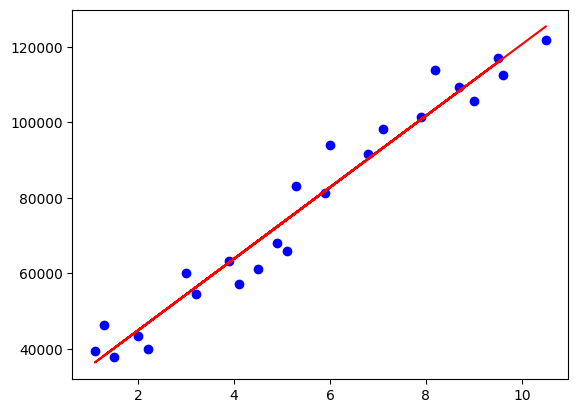

In [16]:
y_train_predict = reg.predict(X_train)

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_train_predict, color='red')
plt.show()

In [17]:
reg.score(X_train, y_train)

0.9589982279707024

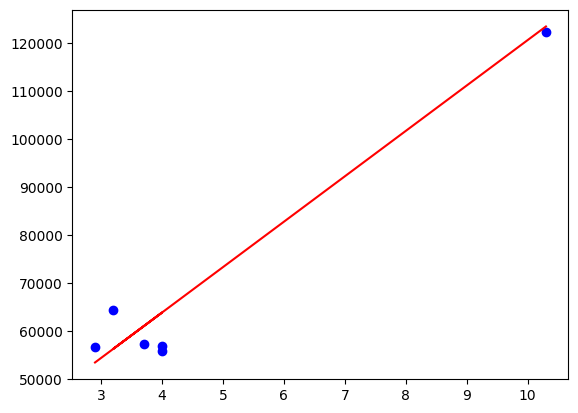

In [18]:
y_predict = reg.predict(X_test)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_predict, color='red')
plt.show()

In [19]:
reg.score(X_test, y_test)

0.9410517532426538

In [20]:
SS_res = np.sum((y_test - y_predict) ** 2)
SS_tot = np.sum((y_test - np.mean(y_test)) ** 2)

R_squared = 1 - (SS_res / SS_tot)

print(f"Coef. of determination for Salary is {R_squared.values}")

Coef. of determination for Salary is [0.94105175]


/home/dduraku/Cursus/projet_classification_iris/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [21]:
from sklearn.metrics import r2_score

print(f"Coeff. of determination is {r2_score(y_test, y_predict)}")

Coeff. of determination is 0.9410517532426538


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "Lasso": Lasso()
}

In [23]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    bias = mean_squared_error(y_train, y_pred_train)

    variance = mean_squared_error(y_test, y_pred_test)

    r2 = r2_score(y_test, y_pred_test)

    results.append({
        'Model': name,
        'Bias': bias,
        'Variance': variance,
        'Coef. of Determination': r2
    })

results

/home/dduraku/Cursus/projet_classification_iris/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[{'Model': 'LinearRegression',
  'Bias': np.float64(30638506.205539525),
  'Variance': np.float64(34218893.52055574),
  'Coef. of Determination': 0.9410517532426538},
 {'Model': 'DecisionTree',
  'Bias': np.float64(0.0),
  'Variance': np.float64(40540027.166666664),
  'Coef. of Determination': 0.9301624547405478},
 {'Model': 'RandomForest',
  'Bias': np.float64(7235195.91417917),
  'Variance': np.float64(26368425.785283323),
  'Coef. of Determination': 0.9545756069272106},
 {'Model': 'Lasso',
  'Bias': np.float64(30638506.330702767),
  'Variance': np.float64(34218747.90914469),
  'Coef. of Determination': 0.9410520040847035}]

In [24]:
results_df = pd.DataFrame(results)
results_df

,Model,Bias,Variance,Coef. of Determination
0,LinearRegression,3.063851e+07,3.421889e+07,0.941052
1,DecisionTree,0.000000e+00,4.054003e+07,0.930162
2,RandomForest,7.235196e+06,2.636843e+07,0.954576
3,Lasso,3.063851e+07,3.421875e+07,0.941052


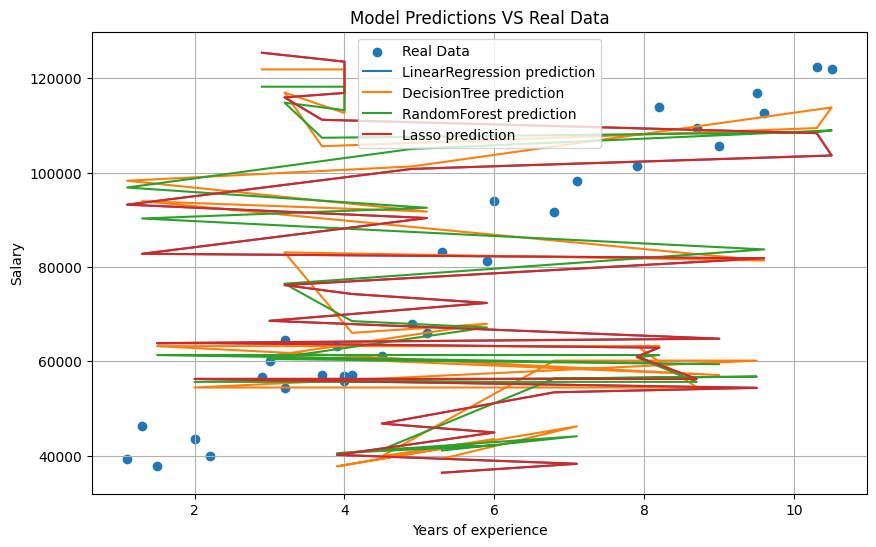

In [27]:
X = salary_df[["YearsExperience"]]
y = salary_df["Salary"]

plt.figure(figsize=(10, 6))

plt.scatter(X, y, label='Real Data')

for name, model in models.items():
    y_pred_all = model.predict(X.sort_values('YearsExperience'))
    plt.plot(X, y_pred_all, label=f'{name} prediction')

plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Model Predictions VS Real Data')
plt.legend()
plt.grid(True)

plt.show()